# Exercise 3: Fourier properties


### Relevant Concepts

__DFT of sinusoids:__ When a real sinusoid has an integer number of cycles in $N$ samples, the frequency of the sinusoid exactly matches one of the bin frequencies in an $N$ point DFT. Hence the DFT spectrum of the sinusoid has a value of zero at every DFT bin except at the two bins that match the frequency of the sinusoid. Otherwise, the energy of the sinusoid is spread over all the bins. When there are multiple sinusoids, the equations extend to each sinusoid.

\begin{align}
 x[n]&=&A_{0}\cos\left(2\pi k_{0}n/N\right)=\frac{A_{0}}{2}{\textstyle e}^{j2\pi k_{0}n/N}+\frac{A_{0}}{2}{\textstyle e}^{-j2\pi k_{0}n/N}\\
 X[k] &=& \frac{A_0}{2} \,\,\, \mathrm{for} \,\,\, k = k_0, -k_0; \,\,\,\, 0 \,\,\,\mathrm{otherwise}
\end{align}

__Zero-padding:__ Zero-padding a signal is done by adding zeros at the end of the signal. If we perform zero-padding to a signal before computing its DFT, the resulting spectrum will be an interpolated version of the spectrum of the original signal.  In most implementations of the DFT (including the FFT algorithms) when the DFT size is larger than the length of the signal, zero-padding is implicitly done.

__Zero phase windowing:__ Zero phase windowing of a frame of a signal puts the centre of the signal at the zero time index for DFT computation. By moving the centre of the frame to zero index by a circular shift, the computed DFT will not have the phase offset which would have otherwise been introduced (recall that a shift of the signal causes the DFT to be multiplied by a complex exponential, which keeps the magnitude spectrum intact but changes the phase spectrum). When used in conjunction with zero-padding, zero phase windowing is also useful for the creation of a frame of length of power of 2 for FFT computation (`fftbuffer`).

If the length of the signal $x$ is $M$ and the required DFT size is $N$, the zero phase windowed version of the signal, `dftbuffer`, for DFT computation can be obtained by (works for both even and odd $M$):

    hM1 = floor((M+1)/2)
    hM2 = floor(M/2)
    dftbuffer = zeros(N)
    dftbuffer[:hM1] = x[hM2:]
    dftbuffer[-hM2:] = x[:hM2]

__Real, even and odd signals:__ A signal is real when it does not have any imaginary component, and all sounds are real signals. A signal $x$ is even if $x[n] = x[-n]$, and odd if $x[n] = -x[-n]$. For a signal of length $M$ (and $M$ is odd), in the context of a zero phase windowed signal and its DFT, the signal is even if $x[n] = x[M-n]$ and odd if $x[n] = -x[M-n]$, $1 \leq n \leq M-1$. The DFT properties show that for real input signals, the magnitude spectrum is even and the phase spectrum is odd. Furthermore, when the input signal is both real and even, the DFT is real valued, with an even magnitude spectrum and imaginary component equal to zero. In summary, if $x$ is an input signal of length $M$ ($M$ is odd) and $X = \mathrm{DFT}(x,M)$, then for $1 \leq k \leq M-1$

If $x$ is real, $\left|X[k]\right| = \left|X[M-k]\right|$ and $\boldsymbol{<}\!X[k] = -\boldsymbol{<}\!X[M-k]$

If $x$ is real and even, $\left|X[k]\right| = \left|X[M-k]\right|$ and $\mathrm{imag}(X[k]) = 0$


__Positive half of the DFT spectrum:__ Audio signals are real signals. Due to the symmetry properties of the DFT of a real signal, it is sufficient to store only one half of the magnitude and phase spectra. To save on both storage and computation, we will just store just the half spectrum when possible.

From an $N$ point DFT ($N$ even), we can obtain the positive half of the spectrum by considering only the first $(N/2)+1$ samples of the DFT. We can compute the magnitude spectrum of the positive half (in dB) as $m_X = 20\log_{10}\left|X[0:(N/2)+1]\right|$, where $X$ is the DFT of the input.

__Filtering:__ Filtering involves selectively suppressing certain frequencies present in the signal. Filtering is often performed in the time domain by the convolution of the input signal with the impulse response of a filter. The same operation can also be done in the DFT domain using the properties of DFT, by multiplying the DFT of the input signal by the DFT of the impulse response of the filter. In this assignment, we will consider a very simple illustrative filter that suppresses some frequency components by setting some DFT coefficients to zero. It is to be noted that the convolution operation here is circular convolution with a period $N$, the size of the DFT.

If $x_1[n] \Leftrightarrow X_1[k]$ and $x_2[n] \Leftrightarrow X_2[k]$, $x_1[n] * x_2[n] \Longleftrightarrow X_1[k]\,X_2[k]$


## Part 1 - Minimize energy spread in DFT of sinusoids

Given an input signal consisting of two sinusoids, the function `minimize_energy_spread_dft()` selects the first `M` samples from the signal and return the positive half of the DFT magnitude spectrum (in dB), such that it has only two non-zero values.

`M` is to be calculated as the smallest positive integer for which the positive half of the DFT magnitude spectrum has only two non-zero values. To get the positive half of the spectrum, first compute the `M` point DFT of the input signal (for this you can use the `fft()` function of `scipy.fftpack`). Consider only the first `(M/2)+1` samples of the DFT, computing the magnitude spectrum of the positive half (in dB) as `mX = 20*log10(abs(X[:M/2+1]))`, where `X` is the DFT of the input signal.

The input arguments to this function are the input signal `x` (of length W >= M) consisting of two sinusoids of frequency `f1` and `f2`, the sampling frequency `fs` and the value of frequencies `f1` and `f2`. The function returns the positive half of the magnitude spectrum `mX`. For this question, you can assume the input frequencies `f1` and `f2` to be positive integers and factors of `fs`, and that `M` is even.

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 (or -240 dB) in magnitude. For practical purposes, all values with absolute value less than 1e-6 (or -120 dB) can be considered to be zero.

HINT: The DFT magnitude spectrum of a sinusoid has only one non-zero value (in the positive half of the DFT spectrum) when its frequency coincides with one of the DFT bin frequencies. This happens when the DFT size (`M` in this question) contains exactly an integer number of periods of the sinusoid. Since the signal in this question consists of two sinusoids, this condition holds true for each of the sinusoids, so that the DFT magnitude spectrum has only two non-zero values, one per sinusoid.

`M` can be computed as the Least Common Multiple (LCM) of the sinusoid periods (in samples). The LCM of two numbers `x`, `y` can be computed as: `x*y/gcd(x,y)`, where gcd denotes the greatest common divisor.

In [19]:
from scipy.fftpack import fft, fftshift
import numpy as np
from math import gcd, ceil, floor
from smstools.models.dftModel import dftAnal, dftSynth
from scipy.signal import get_window
import matplotlib.pyplot as plt

In [ ]:


def minimize_energy_spread_dft(x, fs, f1, f2):
    """ From a signal with two sinusoids compute its magnitude spectrum having only two non-zero value.

    Args:
        x (np.array): input signal
        fs (float): sampling frequency in Hz
        f1 (float): frequency of first sinusoid component in Hz
        f2 (float): frequency of second sinusoid component in Hz

    Returns:
        np.array: positive half of magnitude spectrum (in dB)

    """
    # Compute the periods (in samples) of the sinusoids
    T1 = fs / f1
    T2 = fs / f2

    # Compute the LCM of the two periods
    LCM = int((T1 * T2) / gcd(int(T1), int(T2)))

    # Set M to the LCM value (it ensures integer periods for both sinusoids)
    M = LCM

    # Extract the first M samples from the input signal
    x_M = x[:M]

    # Compute the M-point DFT of the truncated signal
    X = fft(x_M, M)

    # Compute the positive half of the magnitude spectrum (in dB)
    mX = 20 * np.log10(np.abs(X[:M//2 + 1]))

    # Set values below -120 dB to -240 dB for practical purposes (considered zero)
    mX[mX < -120] = -240

    return mX

    



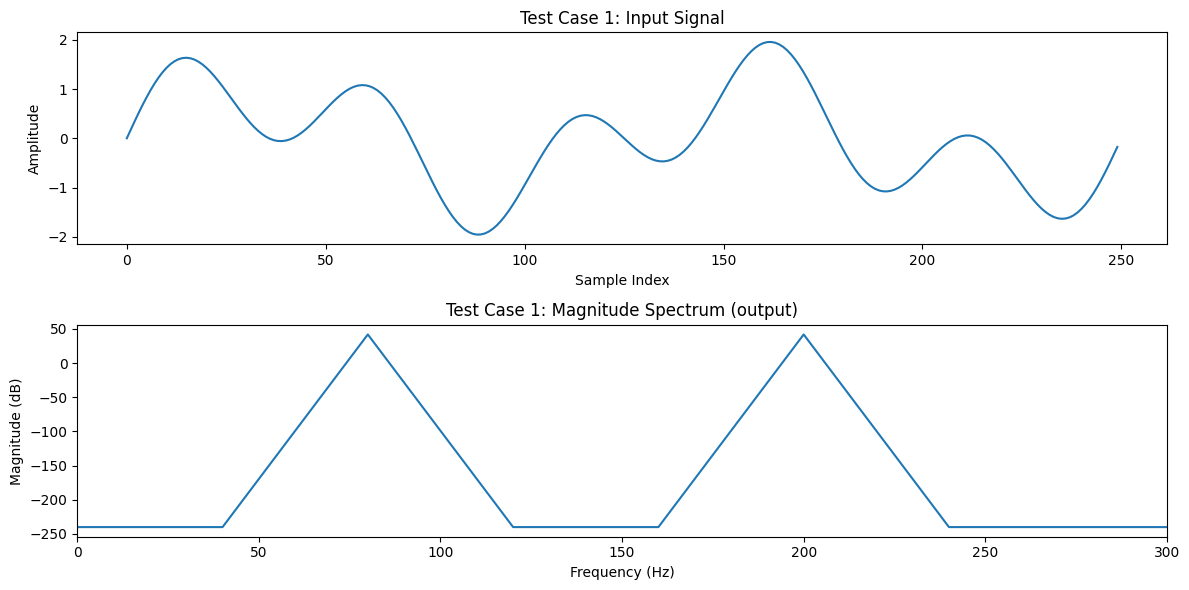

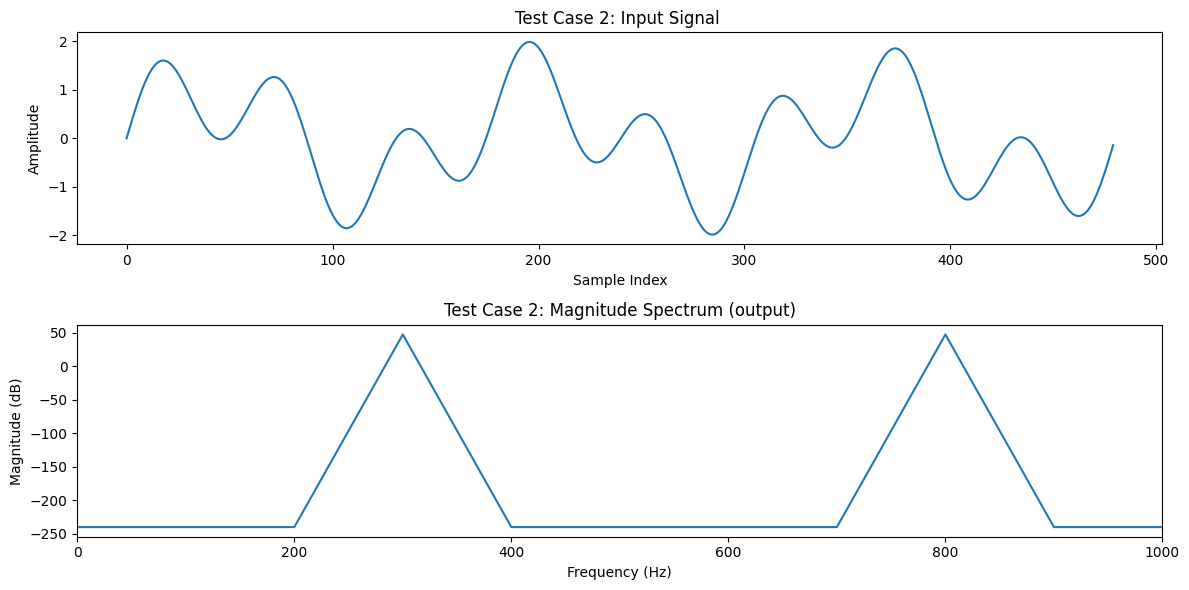

In [ ]:


# Test case 1
fs1 = 10000
f1_1 = 80
f2_1 = 200
M1 = 250  # Total number of samples to meet the condition
n1 = np.arange(M1)
x1 = np.sin(2 * np.pi * f1_1 * n1 / fs1) + np.sin(2 * np.pi * f2_1 * n1 / fs1)

mX1 = minimize_energy_spread_dft(x1, fs1, f1_1, f2_1)

# Plot the input signal and its magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(n1, x1)
plt.title("Test Case 1: Input Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, fs1/2, len(mX1)), mX1)
plt.title("Test Case 1: Magnitude Spectrum (output)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.xlim(0,300)
plt.tight_layout()
plt.show()




# Test case 2
fs2 = 48000
f1_2 = 300
f2_2 = 800
M2 = 480  # Total number of samples to meet the condition
n2 = np.arange(M2)
x2 = np.sin(2 * np.pi * f1_2 * n2 / fs2) + np.sin(2 * np.pi * f2_2 * n2 / fs2)

mX2 = minimize_energy_spread_dft(x2, fs2, f1_2, f2_2)

# Plot the input signal and its magnitude spectrum
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(n2, x2)
plt.title("Test Case 2: Input Signal ")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")


plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, fs2/2, len(mX2)), mX2)
plt.title("Test Case 2: Magnitude Spectrum (output)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.xlim(0,1000)
plt.tight_layout()
plt.show()

## Part 2 - Symmetry properties of the DFT

The function `test_real_even()` checks if the input signal is real and even using the symmetry properties of its DFT. The function will return the result of this test, the zero-phase windowed version of the input signal (`dftbuffer`), and its DFT.

Given an input signal `x` of length `M`, do a zero phase windowing of `x` without any zero-padding. Then compute the `M` point DFT of the zero phase windowed signal and use the symmetry of the computed DFT to test if the input signal `x` is real and even. Return the result of the test, the `dftbuffer` computed, and the DFT of the `dftbuffer`.

The input argument is a signal `x` of length `M`. The output is a tuple with three elements
`(isRealEven, dftbuffer, X)`, where `isRealEven` is a boolean variable which is `True` if `x` is real and even, else `False`. `dftbuffer` is the `M` length zero phase windowed version of `x`. `X` is the `M` point DFT of the `dftbuffer`.

To make the problem easier, we will use odd length input sequence in this question (`M` is odd).

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 in magnitude. For practical purposes, all values with absolute value less than 1e-6 can be considered to be zero. Use an error tolerance of 1e-6 to compare if two floating point arrays are equal.
.

In [ ]:


def test_real_even(x):
    """check if x is real and even using the symmetry properties of its DFT.
    Args:
        x (np.array): input signal of length M (M is odd)

    Returns:
        tuple including:
        isRealEven (boolean): True if input x is real and even, and False otherwise
        dftbuffer (np.array): M point zero phase windowed version of x
        X (np.array): M point DFT of dftbuffer

    """
    M = len(x)

    # Create zero phase windowed version of x
    dftbuffer = np.zeros(M)
    half_M = (M - 1) // 2
    dftbuffer[:half_M + 1] = x[half_M:]
    dftbuffer[half_M + 1:] = x[:half_M]

    # Compute the M-point DFT of the zero-phase windowed signal
    X = fft(dftbuffer)

    # Check if the imaginary part of the DFT is close to zero (real signal)
    imag_part = np.imag(X)
    is_real = np.all(np.abs(imag_part) < 1e-6)

    # Check if the signal is even using the symmetry property of the DFT
    is_symmetric = np.allclose(X, np.conj(X[::-1]), atol=1e-6)

    # Combine the conditions to determine if the signal is real and even
    isRealEven = is_real and is_symmetric

    return isRealEven, dftbuffer, X


Test Case 1:
isRealEven: False
dftbuffer: [4. 3. 2. 2. 3.]
X: [14.   -0.j  2.618+0.j  0.382+0.j  0.382-0.j  2.618-0.j]

Test Case 2:
isRealEven: False
dftbuffer: [4. 1. 2. 3. 1. 2. 3.]
X: [16.-0.j      2.+0.6959j  2.+3.5135j  2.-1.0821j  2.+1.0821j  2.-3.5135j
  2.-0.6959j]


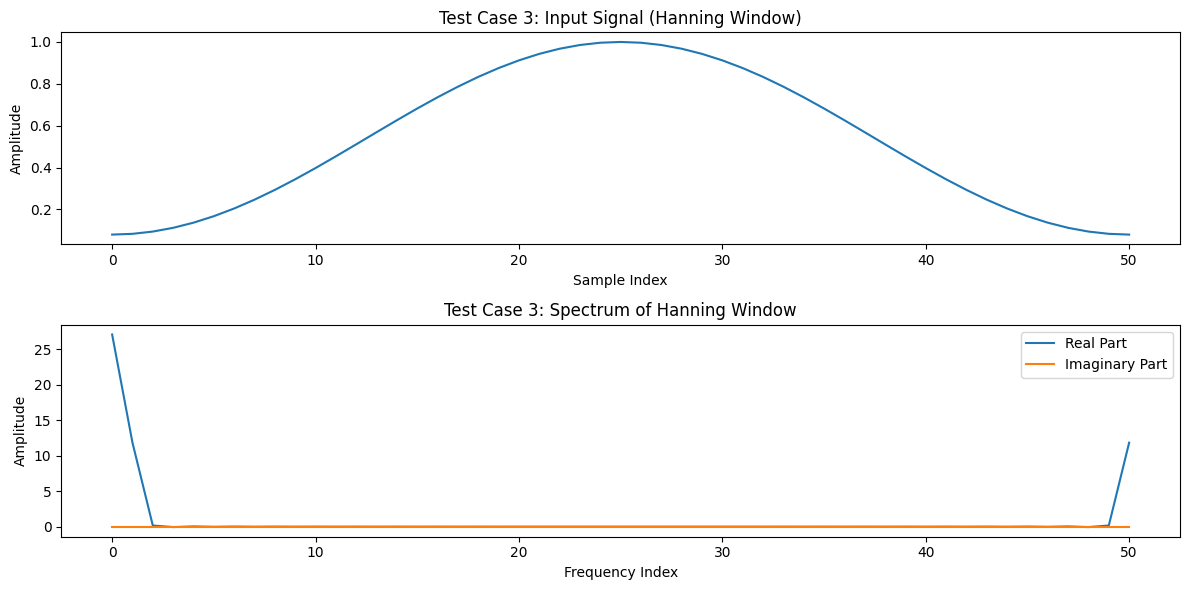

In [ ]:


# Test case 1
x1 = np.array([2, 3, 4, 3, 2])
isRealEven1, dftbuffer1, X1 = test_real_even(x1)
print("Test Case 1:")
print("isRealEven:", isRealEven1)
print("dftbuffer:", dftbuffer1)
print("X:", np.round(X1, 4))

# Test case 2
x2 = np.array([1, 2, 3, 4, 1, 2, 3])
isRealEven2, dftbuffer2, X2 = test_real_even(x2)
print("\nTest Case 2:")
print("isRealEven:", isRealEven2)
print("dftbuffer:", dftbuffer2)
print("X:", np.round(X2, 4))

# Test case with windowed signal
x3 = get_window('hamming', 51, fftbins=False)
isRealEven3, dftbuffer3, X3 = test_real_even(x3)

# Plot the windowed signal and its spectrum
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x3)
plt.title("Test Case 3: Input Signal (Hanning Window)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")

plt.subplot(2, 1, 2)
plt.plot(np.real(X3), label="Real Part")
plt.plot(np.imag(X3), label="Imaginary Part")
plt.title("Test Case 3: Spectrum of Hanning Window")
plt.xlabel("Frequency Index")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


## Part 3 - Suppressing frequency components using DFT model

Given a signal as input, the function `supress_freq_dft_model()` suppresses the frequency components <= 70Hz using the DFT. It returns the filtered signal in the time domain.

Use the DFT to implement a very basic form of frequency domain filtering. Use the functions `dftAnal()` and `dftSynth()` provided in the `dftModel.py` module.

Use `dftAnal()` to obtain the magnitude spectrum (in dB) and phase spectrum of the audio signal. Set the values of the magnitude spectrum that correspond to frequencies <= 70 Hz to -120dB (there may not be a bin corresponding exactly to 70Hz, choose the nearest bin of equal or higher frequency, e.g., using `np.ceil()`).

Use `dftSynth()` to synthesize the filtered output signal. Then return the filtered signal.

Use a hamming window to smooth the signal. Hence, do not forget to scale the output signals by the sum of the window values (as done in `software/models_interface/dftModel_function.py`).  

Please note that this question is just for illustrative purposes and filtering is not usually done this way - such sharp cutoffs introduce artifacts in the output.

The input is a `M` length signal `x`, sampling frequency is `fs` and the FFT size `N`. The output is the filtered signal.

In [ ]:


def suppress_freq_dft_model(x, fs, N):
    """
    Args:
        x (np.array): input signal of length M (odd size)
        fs (float): sampling frequency (Hz)
        N (int): FFT size

    Returns:
       np.array: output signal with filtering (N samples long)
    """

    M = len(x)
    w = get_window('hamming', M)
    outputScaleFactor = sum(w)

    # Analyze the signal using dftAnal
    mX, pX = dftAnal(x * w, w, N)

    # Compute the frequency bins
    freq_bins = np.arange(N // 2 + 1) * (fs / N)

    # Suppress frequencies <= 70Hz
    cutoff_bin = int(np.ceil(70 / (fs / N)))
    mX[:cutoff_bin + 1] = -120  # Set magnitude to -120dB

    # Synthesize the filtered signal
    y = dftSynth(mX, pX, w.size) * outputScaleFactor

    return y


5000


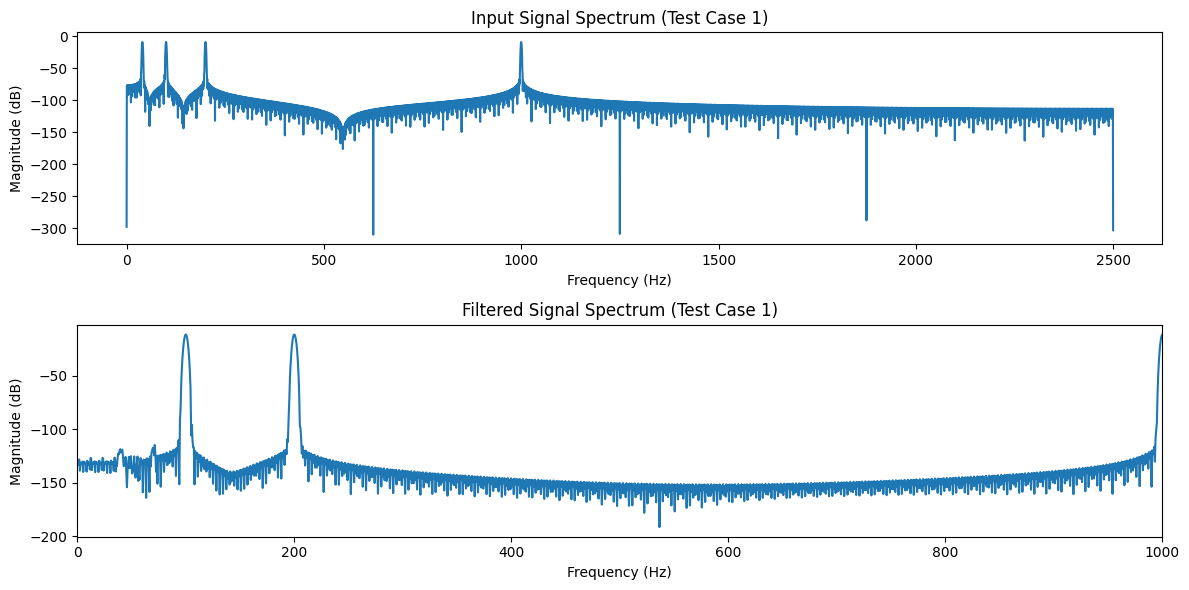

In [ ]:


fs = 5000  # Sampling frequency
N = 8192    # FFT size
t = np.arange(0, 1, 1 / fs)
x1 = (
    np.sin(2 * np.pi * 40 * t) +
    np.sin(2 * np.pi * 100 * t) +
    np.sin(2 * np.pi * 200 * t) +
    np.sin(2 * np.pi * 1000 * t)
)
print(len(x1))

y1 = suppress_freq_dft_model(x1, fs, N)


# Plot magnitude spectra of input and output signals
plt.figure(figsize=(12, 6))

mX1, _ = dftAnal(x1 * get_window('hamming', len(x1)), get_window('hamming', len(x1)), N)
plt.subplot(2, 1, 1)
plt.plot(np.arange(N // 2 + 1) * (fs / N), mX1)
plt.title("Input Signal Spectrum (Test Case 1)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")

# Output signal spectrum
mY1, _ = dftAnal(y1 * get_window('hamming', len(y1)), get_window('hamming', len(y1)), N)
plt.subplot(2, 1, 2)
plt.plot(np.arange(N // 2 + 1) * (fs / N), mY1)
plt.title("Filtered Signal Spectrum (Test Case 1)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.xlim(0,1000)

plt.tight_layout()
plt.show()


5000


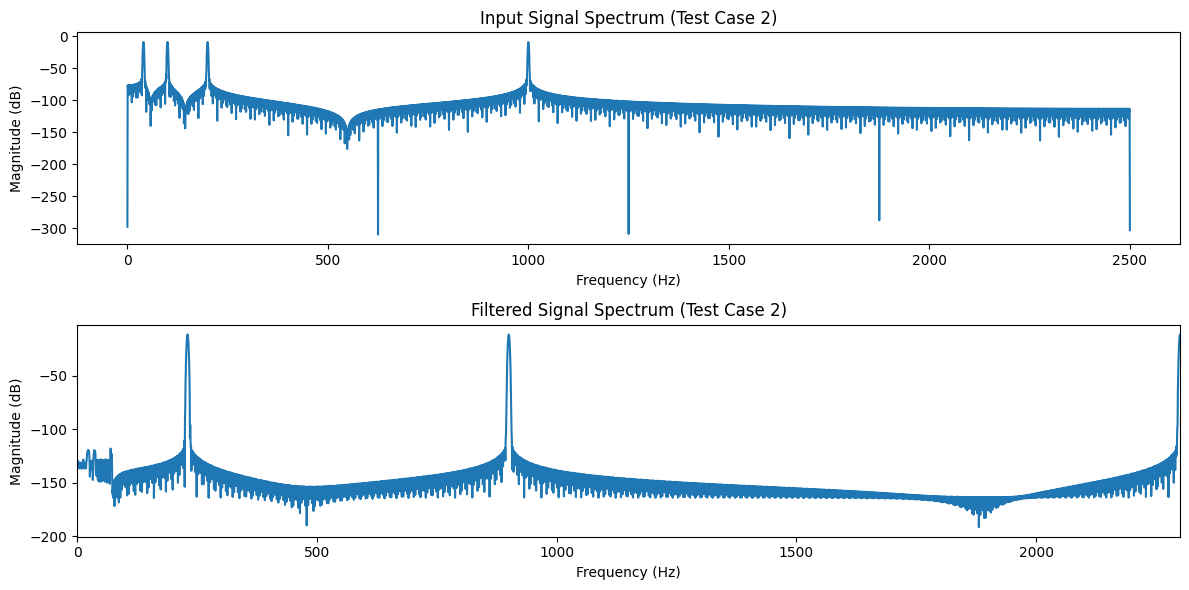

In [ ]:

fs = 5000  # Sampling frequency
N = 8192    # FFT size
t = np.arange(0, 1, 1 / fs)
x2 = (
    np.sin(2 * np.pi * 23 * t) +
    np.sin(2 * np.pi * 36 * t) +
    np.sin(2 * np.pi * 230 * t) +
    np.sin(2 * np.pi * 900 * t) +
    np.sin(2 * np.pi * 2300 * t)
)
print(len(x1))

y2 = suppress_freq_dft_model(x2, fs, N)


# Plot magnitude spectra of input and output signals
plt.figure(figsize=(12, 6))

mX2, _ = dftAnal(x1 * get_window('hamming', len(x1)), get_window('hamming', len(x2)), N)
plt.subplot(2, 1, 1)
plt.plot(np.arange(N // 2 + 1) * (fs / N), mX2)
plt.title("Input Signal Spectrum (Test Case 2)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")

# Output signal spectrum
mY2, _ = dftAnal(y2 * get_window('hamming', len(y1)), get_window('hamming', len(y2)), N)
plt.subplot(2, 1, 2)
plt.plot(np.arange(N // 2 + 1) * (fs / N), mY2)
plt.title("Filtered Signal Spectrum (Test Case 2)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.xlim(0,2300)

plt.tight_layout()
plt.show()


## Part 4 - Window-size, FFT-size, and zero-padding

The function `zp_fft_size_expt()` takes an input signal, compute three different magnitude spectra (with different parameters) and return them.

This function provides some insights into the effects window-size, FFT-size, and zero-padding on the spectrum of a signal.

The input signal is of size 512 samples, the sampling rate is 1000Hz, and the analysis window used is hamming. The three set of analysis parameters are:

1. window-size = 256, FFT-size = 256 (no zero-padding)
2. window-size = 512, FFT-size = 512 (no zero-padding)
2. window-size = 256, FFT-size = 512 (zero-padding of 256 samples)

Use `dftAnal()` to obtain the positive half of the magnitude spectrum (in dB). Return the 3 magnitude spectra in dB.


In [ ]:


def zp_fft_size_expt(x, window_size=[256, 512, 256], FFT_size=[256, 512, 512]):
    """compute magnitude spectra of x with different window sizes and FFT sizes.

    Args:
        x (np.array): input signal (512 samples long)

    Returns:
        list with magnitude spectra (np.array)
    """
    spectra = []  # To store the magnitude spectra
    
    # Loop through the three sets of window and FFT sizes
    for win_size, fft_size in zip(window_size, FFT_size):
        # Apply the window function (Hamming window in this case)
        window = get_window('hamming', win_size)

        # Truncate the signal to match the window size
        truncated_signal = x[:win_size]
 
        windowed_signal = truncated_signal * window
    
        
        # Calculate the magnitude spectrum using dftAnal
        mX, _ = dftAnal(windowed_signal, window, fft_size)
        
        # Append the magnitude spectrum (in dB) to the list
        spectra.append(20 * np.log10(np.abs(mX)))
    
    return spectra

    


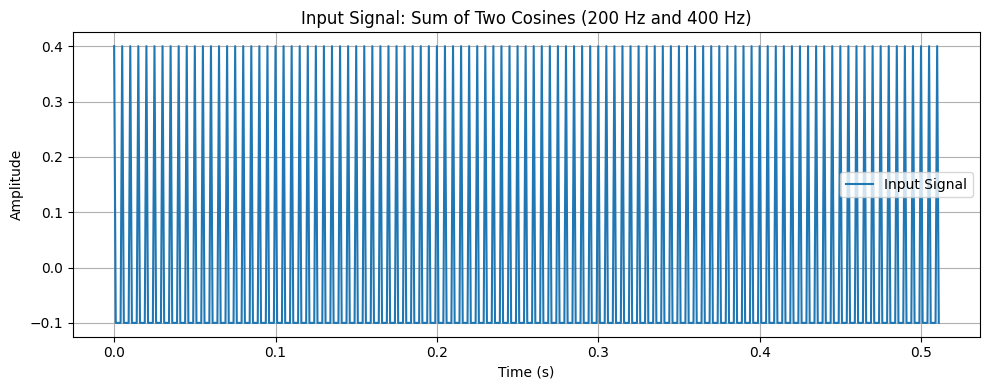

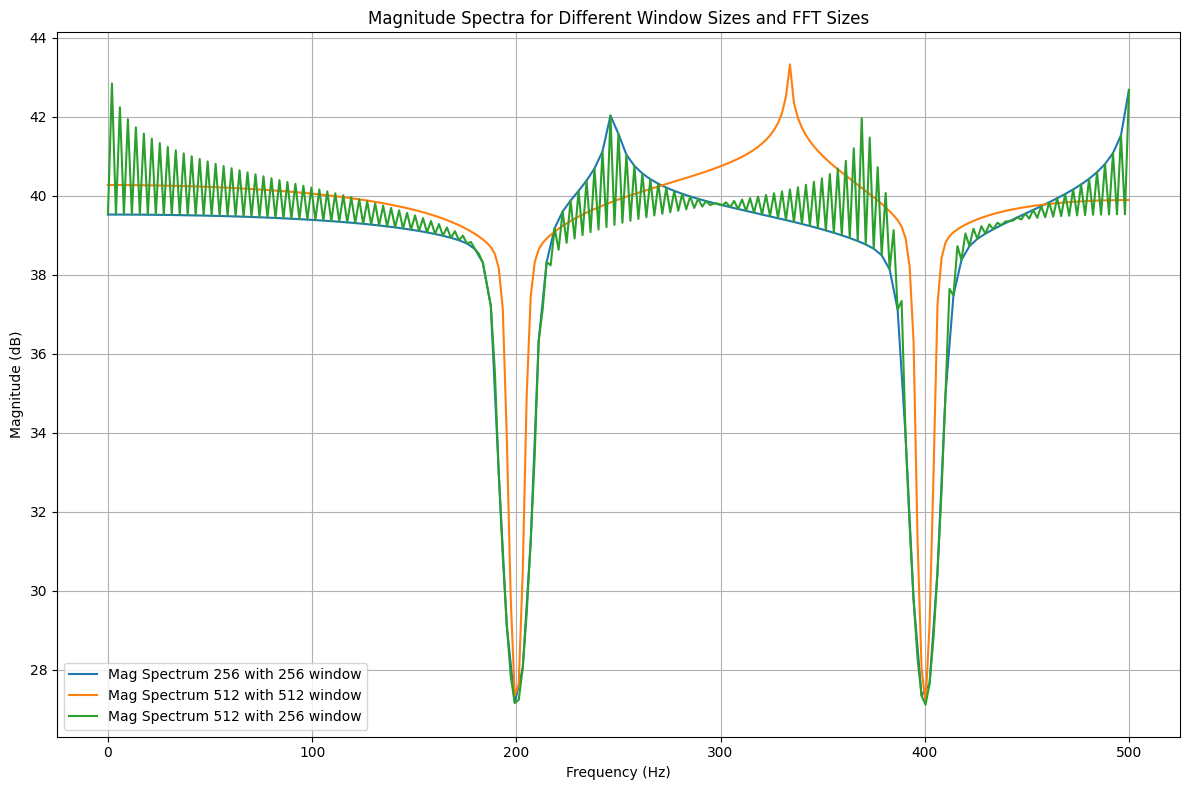

In [ ]:

import sounddevice as sd

# Frequency axis for plotting: should be half the FFT size
fs = 1000  # Sampling frequency
n = np.arange(512) / fs  # Time axis
x = 0.2 * np.cos(2 * np.pi * 200 * n) + 0.2 * np.cos(2 * np.pi * 400 * n)

# Plot the input signal
plt.figure(figsize=(10, 4))
plt.plot(n, x, label="Input Signal")
plt.title("Input Signal: Sum of Two Cosines (200 Hz and 400 Hz)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

sd.play(x, fs)
sd.wait()

# Compute the magnitude spectra using zp_fft_size_expt function
mag_spectra = zp_fft_size_expt(x)

# Plot the results
plt.figure(figsize=(12, 8))

# Adjust frequency axis to match the FFT size output (half the FFT size)
for i, spec in enumerate(mag_spectra):
    fft_size = [256, 512, 512][i]  # Get the corresponding FFT size for this spectrum
    window_size=[256, 512, 256][i]
    freq_axis = np.linspace(0, fs / 2, fft_size // 2 + 1)  # Frequency axis up to fs/2

    # Plot each spectrum
    plt.plot(freq_axis, spec[:len(freq_axis)], label=f"Mag Spectrum {fft_size} with {window_size} window")

# Customize plot
plt.title("Magnitude Spectra for Different Window Sizes and FFT Sizes")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


If we were to estimate the frequency of the sinusoid using its DFT, a first principles approach is to choose the frequency value of the bin corresponding to the maximum in the DFT magnitude spectrum. If you were to take this approach, which of the magnitude spectra will give you a better estimate of the frequency of the sinusoid? Comment and discuss.

The magnitude spectra in the provided result compare different FFT sizes and window lengths, revealing variations in frequency estimation accuracy. 

Among the three cases, the spectrum generated with an FFT size of 512 and a matching window of 512 exhibits the sharpest and most distinct peak, reducing spectral leakage and improving frequency resolution. In contrast, the other two spectra show more oscillations and a broader lobes, making frequency estimation less precise.

The sharper peak in the 512-512 case provides a more reliable frequency estimate by making it easier to see the actual sinusoidal frequency. The spectra with mismatched window and FFT sizes introduce additional spectral leakage and side lobes, complicating frequency detection. 

So if I ware to take this approach I would choose the magintue approzimated by the FFT size of 512 and window size 512.